<a href="https://colab.research.google.com/github/sansan94/Python/blob/master/Examen_OPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Data Science
## Nivel intermedio


## Sección A

### A.2 Datos abiertos de la CDMX


##### La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las carpetas de investigación aportados por la PGJ. La tabla está disponible aquí:
https://datos.cdmx.gob.mx/explore

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
df = pd.read_table('/content/gdrive/My Drive/OPI_Analytics/Carpeta_Investigacion.csv', sep = ",")

#### 1) ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

Empezaría analizando el número de valores nulos en la base de datos, decidiría que hacer con las variables que contuvieran esos valores dependiendo de la cantidad de los mismos. Vería la opción de sustituir los valores o definitivamente eliminar esos registros.

Revisaría el rango de los años de los eventos para ver que no haya un 2050 ya que eso sería imposible.



#### 2) ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

Existe un total de 808,871 registros y las fechas van desde el 1906 hasta el 2019.

In [4]:
df.count

<bound method DataFrame.count of         año_hechos  mes_hechos  ...    latitud                      Geopoint
0           2016.0       Enero  ...  19.481076      19.4810759998,-99.103527
1           2017.0   Noviembre  ...        NaN                           NaN
2           2017.0   Noviembre  ...  19.395398  19.3953976727,-99.1060723829
3           2015.0   Diciembre  ...  19.322458      19.3224579998,-99.055887
4           2018.0        Mayo  ...  19.319141  19.3191405147,-99.0427862526
...            ...         ...  ...        ...                           ...
808866      2017.0       Enero  ...  19.470400     19.4704001998,-99.1739857
808867      2017.0       Enero  ...  19.471861   19.4718613508,-99.179428038
808868      2017.0       Enero  ...  19.294460   19.294460196,-99.1022395533
808869      2016.0  Septiembre  ...  19.197004  19.1970042424,-99.1461730609
808870      2017.0       Enero  ...        NaN                           NaN

[808871 rows x 18 columns]>

In [5]:
df.describe()

,año_hechos,ao_inicio,longitud,latitud
count,808673.000000,808871.000000,777536.000000,777536.000000
mean,2017.231278,2017.385776,-99.137481,19.388497
std,1.417107,1.020354,0.058754,0.069692
min,1906.000000,2016.000000,-99.342765,9.486549
25%,2016.000000,2017.000000,-99.174906,19.342264
50%,2017.000000,2017.000000,-99.142680,19.391685
75%,2018.000000,2018.000000,-99.101420,19.437588
max,2019.000000,2019.000000,-98.922660,19.611544


In [6]:
df.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"


#### 3) ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?


Los delitos más frecuentes son:


1.   Violencia familiar (69,517)
2.   Robo de objetos (52,214)
3.   Robo a negocio sin violencia (51,426)
4.   Fraude (45,349)
5.   Denuncia de hechos (44,433)



In [7]:
delitos = df.groupby('delito').count()['ao_inicio']

In [8]:
delitos.sort_values( ascending = False).head()

delito
VIOLENCIA FAMILIAR              69517
ROBO DE OBJETOS                 52214
ROBO A NEGOCIO SIN VIOLENCIA    51426
FRAUDE                          45349
DENUNCIA DE HECHOS              44433
Name: ao_inicio, dtype: int64

In [9]:
delitos_top10 = delitos.sort_values( ascending = False).head(10)

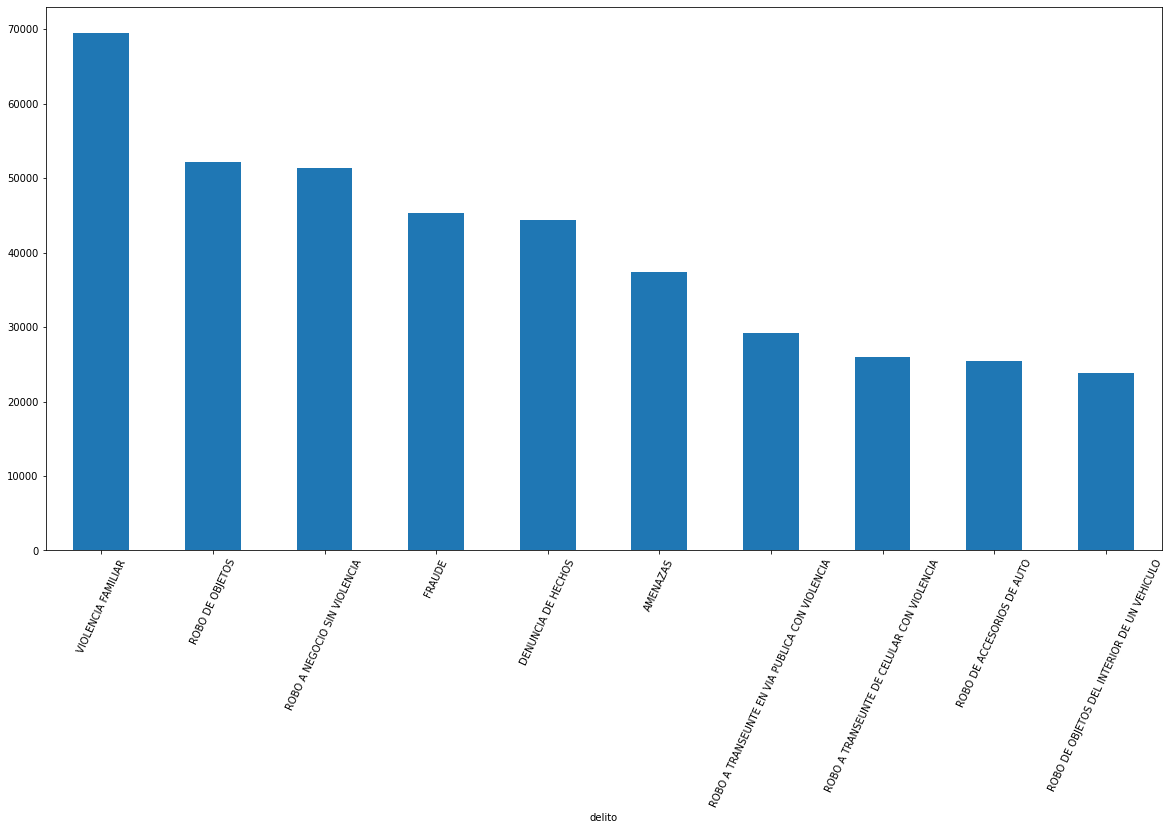

In [10]:
delitos_top10.plot(kind='bar',rot=65,figsize=(20,10))

#### 4) Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

#### 5) ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?.¿Por qué crees que sea esto?

La alcaldía con mayor número de delitos es la alcaldía de Cuauhtemoc con un total de 131,397 y la de menor la de Abala con 1 delito. Esto puede ser dado que la alcaldía Cuauhtemoc es el centro y corazón de CDMX por lo que hay mayor movimiento y número de personas. Por el contrario, la alcaldía de Abala es infimamente pequeña.

In [11]:
delAlc = df.groupby('alcaldia_hechos').count()['ao_inicio']

delAlc = delAlc.sort_values( ascending = False)

delAlc[[0,-1]]

alcaldia_hechos
CUAUHTEMOC    131397
ABALA              1
Name: ao_inicio, dtype: int64

#### 6) Dentro de cada alcaldía, cuáles son las tres colonias con más delitos


In [12]:
delAlcCol = df.groupby(['alcaldia_hechos','colonia_hechos']).count()['ao_inicio'].reset_index()
delAlcCol.columns = ['Alcaldia', 'Colonia', 'Delitos']
delAlcCol

,Alcaldia,Colonia,Delitos
0,ALVARO OBREGON,19 DE MAYO,43
1,ALVARO OBREGON,1A AMPLIACIÓN PRESIDENTES,263
2,ALVARO OBREGON,1A VICTORIA,187
3,ALVARO OBREGON,1ER REACOMODO CORPUS CHRISTI,24
4,ALVARO OBREGON,2A AMPLIACIÓN EL PIRU,93
...,...,...,...
1751,XOCHIMILCO,VILLA DE LA NORIA,1
1752,XOCHIMILCO,XOCHIMILCO,38
1753,XOCHIMILCO,XOCHIPILLI,47
1754,XOCHIMILCO,ZACATEPEC(SAN MATEO XALPA),122


#### 7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

##### Meses

Gráficando todos los meses del año podemos observar que la segunda mitad suele ser más tranquila en la CDMX, los meses más peligrosos son marzo y mayo, aunque esto pudo haber cambiado a través del tiempo. En un futuro podríamos compararlo año tras año para ver si es la misma tendencia.

In [13]:
mes = df.groupby(['mes_hechos']).count()['ao_inicio'].reset_index()
mes.columns = ['mes_hechos', 'frecuencia']

In [14]:
mes['mes_hechos'] = pd.Categorical(mes['mes_hechos'], categories=
    ['Enero','Febrero','Marzo','Abril','Mayo','Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    ordered=True)

mes = mes.sort_values(by = ['mes_hechos'])

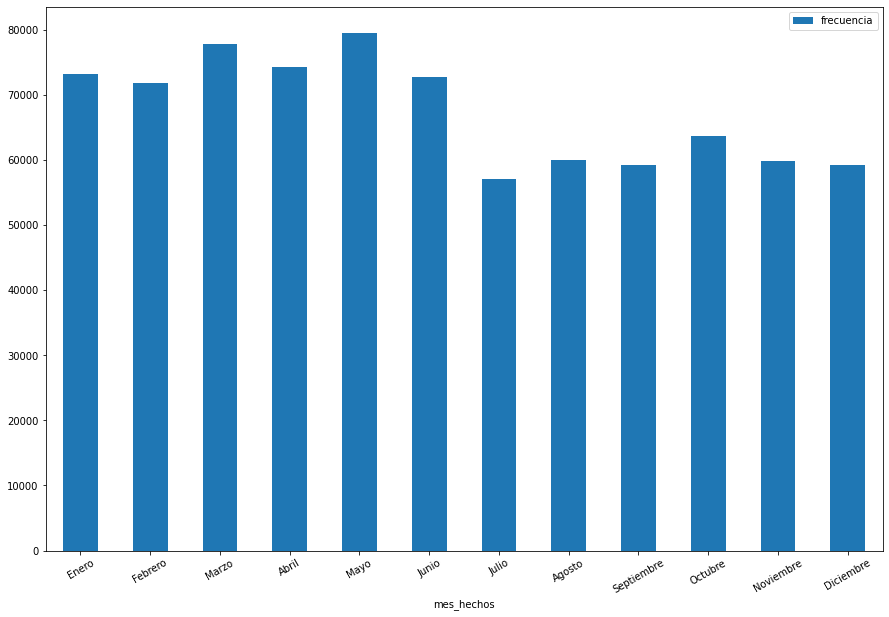

In [15]:
mes.plot.bar(x='mes_hechos', y='frecuencia', rot=30, figsize=(15,10))

In [16]:
df['fecha_hechos'] = pd.to_datetime(df['fecha_hechos'])
df = df.set_index('fecha_hechos')
df.head(3)

,año_hechos,mes_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
fecha_hechos,,,,,,,,,,,,,,,,,
2016-01-05 17:00:00,2016.0,Enero,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
2017-11-01 14:00:00,2017.0,Noviembre,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2017-11-01 16:40:00,2017.0,Noviembre,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"


##### Hora

In [17]:
df['Hora'] = df.index.time
df['diaSemana'] = df.index.day_name()

In [18]:
horas1 = df[['Hora','diaSemana']]

MIN_UNIT_INDEX=4
HOUR_UNIT_INDEX=2

horas1['horaMin'] = horas1['Hora'].apply(lambda x: str(x)[:HOUR_UNIT_INDEX]+"x")
horas1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Hora,diaSemana,horaMin
fecha_hechos,,,
2016-01-05 17:00:00,17:00:00,Tuesday,17x
2017-11-01 14:00:00,14:00:00,Wednesday,14x
2017-11-01 16:40:00,16:40:00,Wednesday,16x
2015-12-30 20:00:00,20:00:00,Wednesday,20x
2018-05-16 16:00:00,16:00:00,Wednesday,16x


In [19]:
horas = horas1.groupby(['horaMin']).count()['diaSemana'].reset_index()
horas.columns=['horaMin', 'Frecuencia']

Podemos observar que hay un gran pico al medio día, las horas de la madrugada baja la cantidad de delitos y en la tarde-noche es donde se promedían un mayor número de delitos.

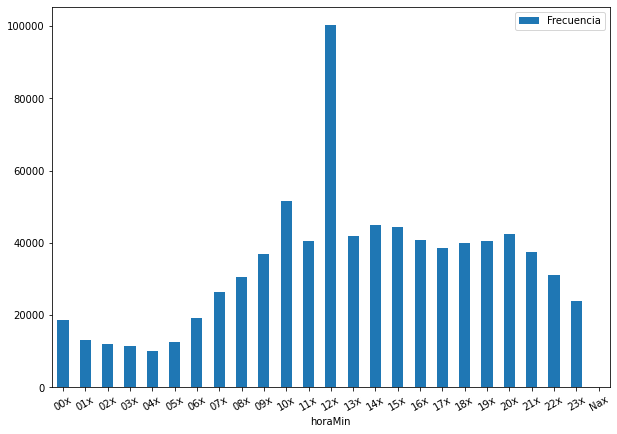

In [20]:
horas.plot.bar(x='horaMin', y='Frecuencia', rot=30, figsize=(10,7))

##### Días de la semana

Muy curiosamente, lo contrario a lo que yo hubiera esperado, el fin de semana son los días en donde hay un menor número de delitos, el viernes es el que tiene la mayor acumulación.

In [21]:
semana = horas1.groupby('diaSemana').count()['horaMin'].reset_index()
semana.columns = ['diaSemana', 'Frecuencia']
semana['diaSemana'] = pd.Categorical(semana['diaSemana'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

semana = semana.sort_values(by = ['diaSemana'])

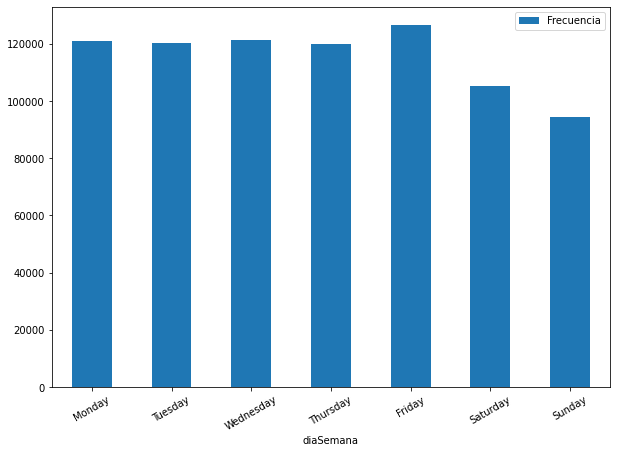

In [22]:
semana.plot.bar(x='diaSemana', y='Frecuencia', rot=30, figsize=(10, 7))

#### 8) ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

#### 9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

#### 10)¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).


#### 11) Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados). 

a) ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en
común?


#### 12) Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?


In [23]:
delRobo = df[(df.delito == "ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA")|(df.delito == "ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA") ]
delRobo.head()

,año_hechos,mes_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint,Hora,diaSemana
fecha_hechos,,,,,,,,,,,,,,,,,,,
2018-01-03 19:50:00,2018.0,Enero,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3SD,LOMAS DE ZARAGOZA,IZTAPALAPA,2018-02-01 18:08:41,Febrero,2018,CALZADA IGNACIO ZARAGOZA,NaN,-98.993751,19.357166,"19.3571664702,-98.9937512991",19:50:00,Wednesday
2017-12-31 18:30:00,2017.0,Diciembre,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-1SD,JOSÉ LÓPEZ PORTILLO,IZTAPALAPA,2018-01-26 18:28:56,Enero,2018,CANAL DE CHALCO,AV. DE LAS TORRES,-99.083134,19.299673,"19.2996734391,-99.0831344492",18:30:00,Sunday
2018-01-24 12:40:00,2018.0,Enero,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-1CD,SANTA CRUZ MEYEHUALCO,IZTAPALAPA,2018-01-24 13:40:33,Enero,2018,MELCHOR OCAMPO Y JUSTO SIERRA,NaN,-99.036645,19.335571,"19.3355708069,-99.0366452136",12:40:00,Wednesday
2016-02-10 08:00:00,2016.0,Febrero,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,URI-CUH-2,UI-1SD,BUENAVISTA,CUAUHTEMOC,2016-03-22 09:01:11,Marzo,2016,AVENIDA INSURGENTES,NaN,-99.152534,19.449696,"19.4496959998,-99.152534",08:00:00,Wednesday
2016-01-12 09:00:00,2016.0,Enero,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-2CD,PUENTE BLANCO,IZTAPALAPA,2016-01-12 09:50:25,Enero,2016,AVENIDA PERIFERICO,RÍO PANUCO,-99.065360,19.331095,"19.3310949998,-99.06536",09:00:00,Tuesday


Las rutas en donde más ocurren este tipo de robos son:


1.   IZP-6 (594)
2.   IZP-9 (285)
3.   GAM-2 (255)
4.   IZP-8 (238)
5.   GAM-4 (223)



In [24]:
delRoboRuta = delRobo.groupby('agencia').count()['ao_inicio']

In [25]:
delRoboRuta.sort_values( ascending = False).head(10)

agencia
IZP-6    594
IZP-9    285
GAM-2    255
IZP-8    238
GAM-4    223
AZ-1     179
AO-1     142
XO-2     135
IZC-2    130
IZP-4    120
Name: ao_inicio, dtype: int64

## Sección B

###QQP

Tuve problemas para correr el script de Pyspark y me fue imposible abrir el documento en cualquier otro programa (R, Python, Jupyter). 

Power BI fue el único programa capaz de abrirlo después de mucho tiempo pero fue imposible publicar o guardar el mapa por el tamaño de la BDD.

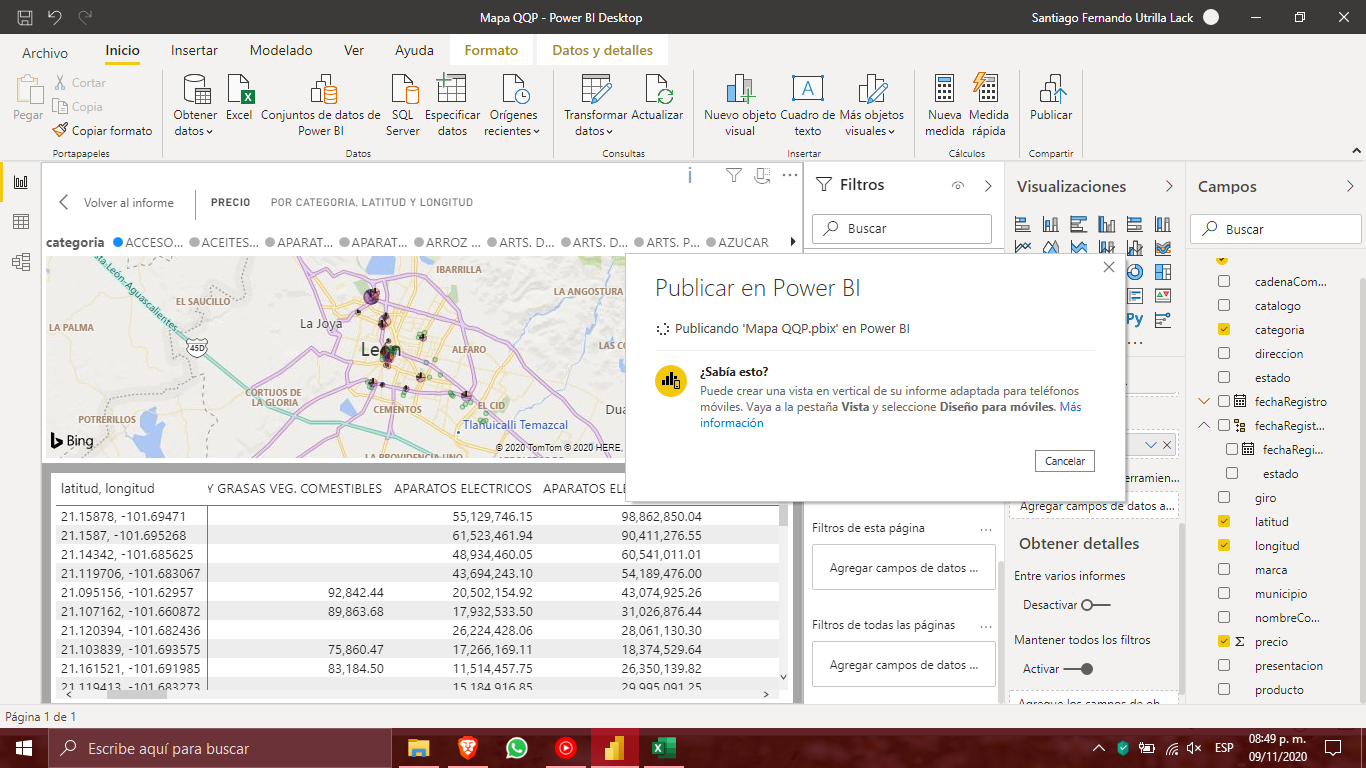

### 1. Procesamiento de los datos


#### a. ¿Cuántos registros hay?


#### b. ¿Cuántas categorías?


#### c. ¿Cuántas cadenas comerciales están siendo monitoreadas?

#### d. ¿Cómo podrías determinar la calidad de los datos? ¿Detectaste algún tipo de inconsistencia o error en la fuente?

#### e. ¿Cuáles son los productos más monitoreados en cada entidad?

#### f. ¿Cuál es la cadena comercial con mayor variedad de productos monitoreados?

### 2 Análisis Exploratorio

#### a. Genera una canasta de productos básicos que te permita comparar los precios geográfica y temporalmente. Justifica tu elección y procedimiento


#### b. ¿Cuál es la ciudad más cara del país?¿Cuál es la más barata?

#### c. ¿Hay algún patrón estacional entre años?

#### d. ¿Cuál es el estado más caro y en qué mes?

#### e. ¿Cuáles son los principales riesgos de hacer análisis de series de tiempo con estos datos?

### 3. Visualización

#### a. Genera un mapa que nos permita identificar la oferta de categorías en la zona metropolitana de León Guanajuato y el nivel de precios en cada una de ellas. Se darán puntos extra si el mapa es interactivo

## Sección C

### C.1 BOPS


Home & Kitchen, ubicado en Estados Unidos y Canadá, cuenta con dos 
canales de venta, Online y B&M. Las ventas Online han tenido éxito los
últimos años y la empresa decidió implementar un nuevo canal de venta (BOPS), que implica comprar en línea y recoger en un punto de venta para ahorrar tiempo y costos.

El nuevo método fue implementado en Octubre del 2011 en Estados Unidos. Los resultados parecen ser negativos pues el promedio de ventas por semana de ambos canales disminuyó partir de su implementación.

La empresa quiere conocer a que se debe esta disminución y se pregunta si es rentable llevarlo a cabo en Canadá.

#### Descarga de liberías y bdd

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
df_onl = pd.read_table('/content/gdrive/My Drive/OPI_Analytics/bops_online.csv', sep = ",")
df_onl=df_onl[['id (DMA)', 'year', 'month', 'week', 'close', ' sales ']]
df_onl.columns = ['id (DMA)', 'year', 'month', 'week', 'close', 'sales']

In [28]:
df_bm = pd.read_table('/content/gdrive/My Drive/OPI_Analytics/bops_bm.csv', sep = ",")
df_bm=df_bm[['id (store)', 'year', 'month', 'week', 'usa', 'after', ' sales ']]
df_bm.columns = ['id (store)', 'year', 'month', 'week', 'usa', 'after', 'sales']

In [29]:
display(df_onl.head())
display(df_bm.head())

,id (DMA),year,month,week,close,sales
0,1,2011,4,17,1,18564.0
1,1,2011,4,18,1,30883.0
2,1,2011,5,19,1,37425.0
3,1,2011,5,20,1,32563.0
4,1,2011,5,21,1,35773.0


,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691.0
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804.0
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104.0
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591.0
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884.0


#### ¿Deberían expandirse a Canadá?

Seria una buena opción y a continuación explico mi punto de vista y razonamiento.

Con la información proporcionada no se puede concluir que la disminución en las ventas se haya debido al BOPS.

Pues la tendencia de ventas es decreciente en ambos países, a pesar de que en Canadá no se implementó. 


In [30]:
ventas_onl = df_onl.groupby(['year','month']).sum()['sales'].reset_index()

In [31]:
ventas_onl['month'] = pd.Categorical(ventas_onl['month'], categories=
    ['4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3'],
    ordered=True)

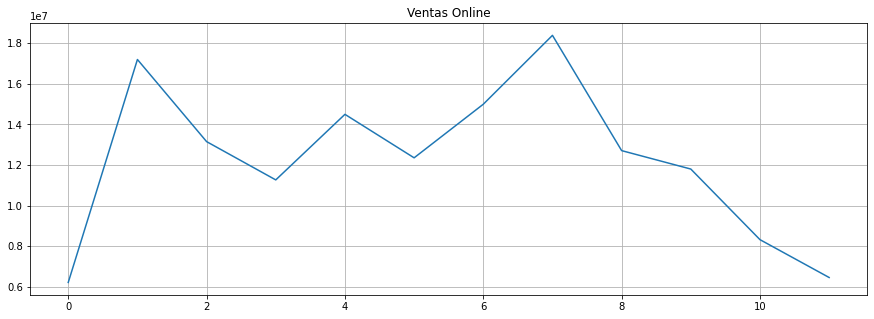

In [32]:
ventas_onl.sales.plot(grid=True, figsize=(15,5), title = 'Ventas Online')

In [33]:
ventas_bm = df_bm.groupby(['year','month']).sum()['sales'].reset_index()

In [34]:
ventas_bm['month'] = pd.Categorical(ventas_bm['month'], categories=
    ['4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3'],
    ordered=True)

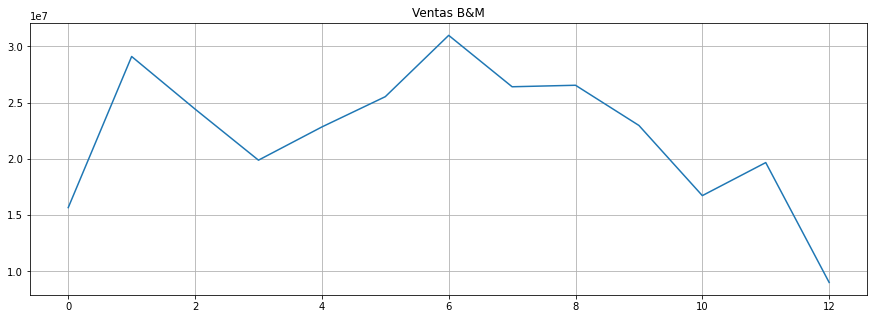

In [35]:
ventas_bm.sales.plot(grid=True, figsize=(15,5), title = 'Ventas B&M')

Si comparamos las ventas B&M en el mes de abril en ambos países, en Canadá disminuyeron el 49% mientras que en Estados Unidos el cambio fue del 41%. 

La información es un limitada y dado que no existe una intersección entre los meses, sería algo muy inadecuado el comparar el promedio de ventas de abril a octubre y compararlo con el promedio de octubre a abril.

In [36]:
#Disminución en Canadá el mes de abril
display((1-1637790.0/3223919.0)*100)

#Disminución en USA el mes de abril
display((1-7376057.0/12443326.0)*100)

49.198785701501805

40.7227858532357

In [37]:
df_bm.pivot_table('sales', 'month', ['year','usa'], aggfunc=np.sum)

year      2011.0                 2012.0            
usa          0.0         1.0        0.0         1.0
month                                              
1.0          NaN         NaN  4465885.0  18501376.0
2.0          NaN         NaN  3335650.0  13395052.0
3.0          NaN         NaN  3627858.0  16040058.0
4.0    3223919.0  12443326.0  1637790.0   7376057.0
5.0    5574215.0  23522551.0        NaN         NaN
6.0    4909941.0  19511820.0        NaN         NaN
7.0    3989253.0  15892986.0        NaN         NaN
8.0    4715835.0  18118665.0        NaN         NaN
9.0    5108483.0  20416631.0        NaN         NaN
10.0   5985028.0  24990320.0        NaN         NaN
11.0   4921546.0  21485183.0        NaN         NaN
12.0   5047659.0  21492279.0        NaN         NaN

Suponiendo que el comportamiento en ambos países es ídentico (supuesto fuerte) podríamos atribuirle al BOPS la contención del 8% en la caída de las ventas en Estados Unidos.

In [38]:
df_onl.pivot_table('sales', 'month', ['year','close'], aggfunc=np.sum)

year         2011                  2012           
close           0          1          0          1
month                                             
1             NaN        NaN  6474278.0  5324601.0
2             NaN        NaN  4581185.0  3741569.0
3             NaN        NaN  3846374.0  2612670.0
4       3604937.0  2611444.0        NaN        NaN
5       9686422.0  7505862.0        NaN        NaN
6       7289544.0  5859664.0        NaN        NaN
7       6137277.0  5127332.0        NaN        NaN
8       7881103.0  6611328.0        NaN        NaN
9       6617962.0  5733847.0        NaN        NaN
10      8346111.0  6643667.0        NaN        NaN
11     10398055.0  7982360.0        NaN        NaN
12      7040735.0  5665272.0        NaN        NaN

Considero que las observaciones de Schwarz son acertadas de acuerdo a a los datos. Cuando los clientes tenían una tienda a menos de 50 millas, aproximadamente la mitad de ellos decidían ir de manera presencial y la otra mitad pedía en línea pero las ventas en línea eran iguales o mayores a las ventas presenciales. Yo pienso que se puede deber a diversos factores, el cliente puede asegurar que el producto esta en la versión que el desea, ahorro de tiempo, etc. 

Yo pienso que si sería una muy buena oportunidad incorporar el BOPS en Canadá, principalmente en las zonas en las que haya una tienda cercana, eso ayudaría a aumentar las ventas en tienda física.



#### 2. ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tu razonamiento y metodología.

Como mencione en el inciso anterior, es una suposición muy fuerte asumir que los mercados se comportan de igual manera en USA y Canadá, pero también es insesgado hacer un forecast con la información dada ya que aunque tenemos la información de un año, el programa BOPS se pone en marcha a finales del año del 2011 y separar el impacto de la estacionalidad y el del BOPS sería algo muy inexacto.

Me quedo con la suposición de que el BOPS contuvo la caída en USA en un 8% lo que es igual a 1,029,960 millones de dolares en B&M. 

In [39]:
7376057-12443326.0*0.51

1029960.7400000002

Esto suponiendo que esperabamos el 2012 se vendiera únicamente el 51% del 2011.